<a href="https://colab.research.google.com/github/GabeMaldonado/JupyterNotebooks/blob/master/numerical_categorical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [4]:
df = pd.read_csv('/social-media.csv',
                 index_col=0,
                 usecols=['id', 'age', 'pref_service'])

# Set correct data types.
df['pref_service'] = df['pref_service'].astype('category')
df.head()

,pref_service,age
id,,
0,Facebook,35
1,Facebook,51
2,Facebook,43
3,Facebook,27
4,Facebook,18


## One categorical, one numerical variable: Cat plot

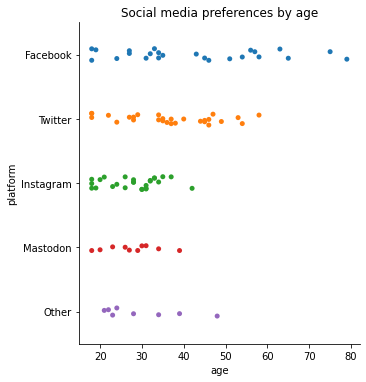

In [5]:
# Calculate the median age.
median_age = df.groupby('pref_service').median().sort_values(
    by='age', ascending=False)

g = sns.catplot(x='age', y='pref_service', data=df, order=median_age.index)
g.ax.set_title('Social media preferences by age')
g.ax.set_ylabel('platform')
g.ax.set_xlabel('age')
plt.show()

## One categorical, one numerical variable: Box plot

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


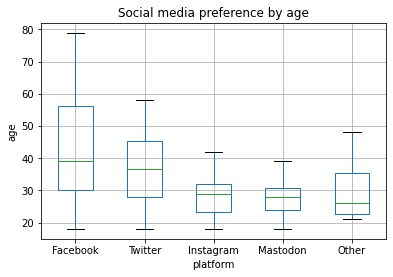

In [7]:
# Re-read the data because we are going to change the dtype of pref_service
# to simplify plotting with DataFrame.boxplot().

df = pd.read_csv('/social-media.csv',
                 index_col=0,
                 usecols=['id', 'age', 'pref_service'])

# Calculate the median age.
median_age = df.groupby('pref_service').median().sort_values(
    by='age', ascending=False)

# Create a new data type where platforms are ordered by median age.
ordered_platform_dtype = pd.CategoricalDtype(median_age.index, ordered=True)

# Assign new ordered categorical dtype.
df['pref_service'] = df['pref_service'].astype(ordered_platform_dtype)

ax = df.boxplot(by='pref_service')
ax.set_title('Social media preference by age')
ax.figure.suptitle('')
ax.set_xlabel('platform')
ax.set_ylabel('age')
plt.show()

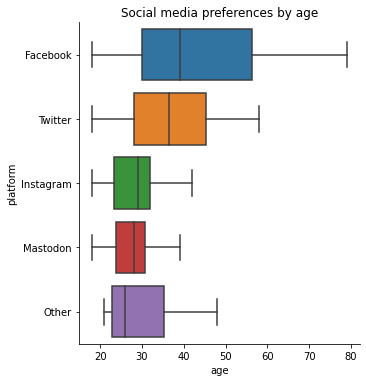

In [8]:
# Seaborn version.
g = sns.catplot(x='age', y='pref_service', kind='box', data=df,
                order=median_age.index)
g.ax.set_title('Social media preferences by age')
g.ax.set_ylabel('platform')
g.ax.set_xlabel('age')
plt.show()

## Two categorical variables, one numeric: Cat plot

In [9]:
df = pd.read_csv('/social-media.csv',
                 index_col=0,
                 usecols=['id', 'age', 'gender', 'pref_service'])

# Remove all 'prefer not to say' and 'nonbinary' responses.
df = df.loc[~df['gender'].isin(['prefer not to say', 'nonbinary'])]

# Set correct data types.
df['gender'] = df['gender'].astype('category')
df['pref_service'] = df['pref_service'].astype('category')

# Calculate the median age.
median_age = df.groupby('pref_service').median().sort_values(
    by='age', ascending=False)

median_age.head()

,age
pref_service,
Facebook,39
Twitter,36
Instagram,29
Mastodon,29
Other,24


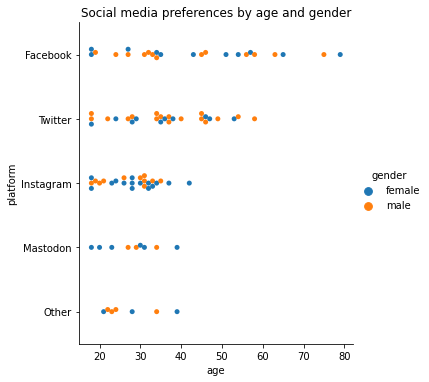

In [10]:
g = sns.catplot(x='age', y='pref_service', hue='gender',
                kind='swarm', data=df, order=median_age.index)
g.ax.set_title('Social media preferences by age and gender')
g.ax.set_ylabel('platform')
g.ax.set_xlabel('age')
plt.show()

## Two categorical variables, one numeric: Box plots

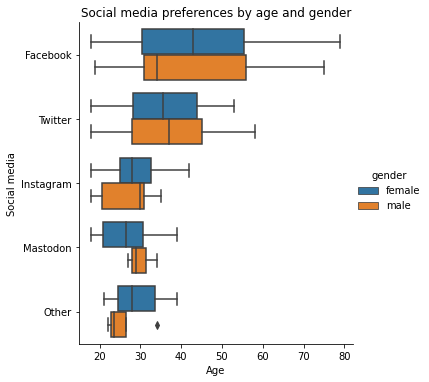

In [11]:
g = sns.catplot(x='age', y='pref_service',
                hue='gender', kind='box', data=df, order=median_age.index)
g.ax.set_title('Social media preferences by age and gender')
g.ax.set_ylabel('Social media')
g.ax.set_xlabel('Age')
plt.show()